To measure whether **labor supply** or **labor demand** is outpacing the other—and by how much—you want to use indicators that reflect **labor availability (supply)** and **employer need (demand)**. Here's how you can approach it:

---

### 🔁 **Supply vs. Demand in the Labor Market**

#### 🔵 **Labor Supply Indicators**

These show the availability and willingness of people to work:

* **Unemployment Level (UNEMPLOY)** – Total people actively seeking work.
* **Labor Force Participation Rate (LFPR)** – % of working-age population in the labor force.
* **Prime-Age LFPR (25–54)** – Cleanest view of core working population.
* **Not in Labor Force, Want a Job Now (NILFWJN)** – Latent supply.
* **Marginally Attached Workers** – Show potential hidden supply.
* **Involuntary Part-Time Rate** – Slack in the supply.

#### 🔴 **Labor Demand Indicators**

These reflect how many workers employers are trying to hire:

* **Job Openings (JOLTS: JTSJOL)** – Pure demand signal.
* **Job Openings Rate** – Openings relative to employed base.
* **Hires (JTSHIR)** – Flow of successful hiring.
* **Quits (JTSQUR)** – Indicates confidence in re-employment (tight market).

---

### 📊 **Derived Metrics to Compare Supply vs. Demand**

These are especially useful for directly assessing imbalance:

| **Metric**                  | **Formula**                 | **Interpretation**                                                            |
| --------------------------- | --------------------------- | ----------------------------------------------------------------------------- |
| **Openings per Unemployed** | `Job Openings / Unemployed` | >1 = more demand than supply (tight); <1 = oversupply                         |
| **Openings per Hire**       | `Job Openings / Hires`      | High = hard to fill roles; rising mismatch                                    |
| **Hires per Unemployed**    | `Hires / Unemployed`        | How many unemployed are being absorbed                                        |
| **Quits per Unemployed**    | `Quits / Unemployed`        | Confidence vs. available jobseekers                                           |
| **Layoffs per Opening**     | `Layoffs / Job Openings`    | If high, signals employers shedding despite openings (volatility or mismatch) |

---

### 🧠 Suggested Composite Approach:

1. **Build a Supply Index** using standardized z-scores of:

   * Unemployed
   * NILFWJN
   * Marginally Attached
   * Involuntary Part-Time Rate

2. **Build a Demand Index** using z-scores of:

   * Job Openings
   * Hires
   * Quits

3. **Demand-Supply Gap = Demand Index – Supply Index**

A **positive gap** means demand is outpacing supply (tight market). A **negative gap** suggests slack in the labor market.

---

Let me know if you want code to implement this or visualize the gap over time.


# Demand

#### 🔴 **Labor Demand Indicators**

These reflect how many workers employers are trying to hire:

* **Job Openings (JOLTS: JTSJOL)** – Pure demand signal.
* **Hires (JTSHIR)** – Flow of successful hiring.
* **Quits (JTSQUR)** – Indicates confidence in re-employment (tight market).

In [55]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Job_Openings_Rate_df = pd.read_csv('Job_Openings_Rate.csv')
Hires_Rate_df = pd.read_csv('Hires_Rate.csv')
Quits_Rate_df = pd.read_csv('Quits_Rate.csv')

# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Job_Openings_Rate_df.to_sql('Openings', conn, index=False, if_exists='replace')
Quits_Rate_df.to_sql('Quits', conn, index=False, if_exists='replace')
Hires_Rate_df.to_sql('Hires', conn, index=False, if_exists='replace')



# SQL query to merge all tables on 'Player'
sql_query = """
SELECT 
    Quits.observation_date, 
    Job_Openings_Rate,
    Hires_Rate,
    Quits_Rate
FROM Quits
INNER JOIN Openings ON Quits.observation_date = Openings.observation_date
INNER JOIN Hires ON Quits.observation_date = Hires.observation_date

"""


# Execute the query and load results into a DataFrame
Demand_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the file to the user


Demand_df

,observation_date,Job_Openings_Rate,Hires_Rate,Quits_Rate
0,2000-12-01,5426,5088,2882
1,2001-01-01,5722,5234,3245
2,2001-02-01,5303,5097,3053
3,2001-03-01,5528,4762,3054
4,2001-04-01,5204,4615,3163
...,...,...,...,...
287,2024-11-01,5307,8031,3032
288,2024-12-01,5374,7508,3095
289,2025-01-01,5371,7762,3256
290,2025-02-01,5370,7480,3250


# Supply

#### 🔵 **Labor Supply Indicators**

These show the availability and willingness of people to work:

* **Unemployment Level (UNEMPLOY)** – Total people actively seeking work.
* **Prime-Age LFPR (25–54)** – Cleanest view of core working population.
* **Not in Labor Force, Want a Job Now (NILFWJN)** – Latent supply.
* **Marginally Attached Workers** – Show potential hidden supply.
* **Involuntary Part-Time Rate** – Slack in the supply.

In [56]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Unemployment_Level_df = pd.read_csv('Unemployment_Level.csv')
Prime_LFPR_df = pd.read_csv('Prime_LFPR.csv')
NILFWJN_df = pd.read_csv('NILFWJN.csv')
Marginally_Attached_Workers_df = pd.read_csv('Marginally_Attached.csv')
Involuntary_Part_Time_df = pd.read_csv('Involuntary_Part_Time.csv')

# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Unemployment_Level_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Prime_LFPR_df.to_sql('LFPR', conn, index=False, if_exists='replace')
NILFWJN_df.to_sql('NILFWJN', conn, index=False, if_exists='replace')
Marginally_Attached_Workers_df.to_sql('Attached_Workers', conn, index=False, if_exists='replace')
Involuntary_Part_Time_df.to_sql('Involuntary_Part_Time', conn, index=False, if_exists='replace')




# SQL query to merge all tables on 'Player'
sql_query = """
SELECT 
    NILFWJN.observation_date, 
    Not_In_Labor_Force_WantAJobNow,
    Unemployment_Level,
    Marginally_Attached_Workers,
    Involuntary_Part_Time
FROM NILFWJN
INNER JOIN Unemployment ON NILFWJN.observation_date = Unemployment.observation_date
INNER JOIN Attached_Workers ON NILFWJN.observation_date = Attached_Workers.observation_date
INNER JOIN Involuntary_Part_Time ON NILFWJN.observation_date = Involuntary_Part_Time.observation_date


"""


# Execute the query and load results into a DataFrame
Supply_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the file to the user


Supply_df

,observation_date,Not_In_Labor_Force_WantAJobNow,Unemployment_Level,Marginally_Attached_Workers,Involuntary_Part_Time
0,1994-01-01,6723,8630,600,4947
1,1994-02-01,6315,8583,489,4677
2,1994-03-01,6387,8470,533,4890
3,1994-04-01,6636,8331,502,4752
4,1994-05-01,6363,7915,436,4836
...,...,...,...,...,...
371,2024-12-01,5505,6886,491,4358
372,2025-01-01,5479,6849,630,4477
373,2025-02-01,5893,7052,463,4937
374,2025-03-01,5915,7083,458,4780


# DERIVED FEATURES

### 📊 **Derived Metrics to Compare Supply vs. Demand**

These are especially useful for directly assessing imbalance:



- Total Separations  
- Temp Help Employment YoY %
- Average Weekly Earnings YoY %  
- Median Hourly Wage Growth (ATL Fed)  
- NILFWJN / Total Population  
- Marginally Attached / Not in Labor Force  
- Involuntary Part-Time Rate  
- U6 – U3 Spread


In [67]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames

Layoffs_df = pd.read_csv('Layoffs.csv')
Total_Seperations_df = pd.read_csv('Total_Seperations.csv')
Temp_Help_Employment_df = pd.read_csv('Temporary_Help_Services_Employment.csv')
Avg_Weekly_Earnings_df = pd.read_csv('Average_Weekly_Earnings.csv')
Median_Hourly_Wage_Growth_df = pd.read_csv('Median_Hourly_Wage_Growth.csv')
Total_Pop_df = pd.read_csv('Total_Population.csv')
Not_in_Labor_Force_df = pd.read_csv('Not_in_Labor_Force.csv')
U6_Unempoyment_df = pd.read_csv('U6_Unemployment_Rate.csv')
U3_Unempoyment_df = pd.read_csv('U3_Unemployment_Rate.csv')



# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Layoffs_df.to_sql('Layoff', conn, index=False, if_exists='replace')
Demand_df.to_sql('Demand', conn, index=False, if_exists='replace')
Supply_df.to_sql('Supply', conn, index=False, if_exists='replace')
Total_Seperations_df.to_sql('Seperation', conn, index=False, if_exists='replace')
Temp_Help_Employment_df.to_sql('Temp_Help', conn, index=False, if_exists='replace')
Avg_Weekly_Earnings_df.to_sql('Weekly_Earning', conn, index=False, if_exists='replace')
Median_Hourly_Wage_Growth_df.to_sql('Median_Wage_Growth', conn, index=False, if_exists='replace')
Total_Pop_df.to_sql('Population', conn, index=False, if_exists='replace')
Not_in_Labor_Force_df.to_sql('NILF', conn, index=False, if_exists='replace')
U6_Unempoyment_df.to_sql('U6', conn, index=False, if_exists='replace')
U3_Unempoyment_df.to_sql('U3', conn, index=False, if_exists='replace')

# SQL query to merge all tables on 'Player'
sql_query = """
SELECT *
FROM Layoff
JOIN Demand ON Layoff.observation_date = Demand.observation_date
JOIN Seperation ON Layoff.observation_date = Seperation.observation_date
JOIN Temp_Help ON Layoff.observation_date = Temp_Help.observation_date
JOIN Weekly_Earning ON Layoff.observation_date = Weekly_Earning.observation_date
JOIN Median_Wage_Growth ON Layoff.observation_date = Median_Wage_Growth.observation_date
JOIN Population ON Layoff.observation_date = Population.observation_date
JOIN NILF ON Layoff.observation_date = NILF.observation_date
JOIN U6 ON Layoff.observation_date = U6.observation_date
JOIN U3 ON Layoff.observation_date = U3.observation_date



"""


# Execute the query and load results into a DataFrame
Supply_Demand_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the file to the user

Supply_Demand_Indicators_df

,observation_date,Layoffs_and_Discharges,observation_date,Job_Openings_Rate,Hires_Rate,Quits_Rate,observation_date,Total_Seperations,observation_date,Temp_Help_Services,...,observation_date,Median_Hourly_Wage_Growth,observation_date,Total_Population,observation_date,Not_in_Labor_Force,observation_date,U6_Unemployment_Rate,observation_date,U3_Unemployment Rate
0,2000-12-01,2018,2000-12-01,5426,5088,2882,2000-12-01,5240,2000-12-01,2587.2,...,2000-12-01,5.4,2000-12-01,283748,2000-12-01,70488,2000-12-01,6.9,2000-12-01,3.9
1,2001-01-01,2220,2001-01-01,5722,5234,3245,2001-01-01,5842,2001-01-01,2566.4,...,2001-01-01,5.4,2001-01-01,283960,2001-01-01,70088,2001-01-01,7.3,2001-01-01,4.2
2,2001-02-01,1855,2001-02-01,5303,5097,3053,2001-02-01,5231,2001-02-01,2533.7,...,2001-02-01,5.3,2001-02-01,284166,2001-02-01,70409,2001-02-01,7.3,2001-02-01,4.2
3,2001-03-01,2133,2001-03-01,5528,4762,3054,2001-03-01,5566,2001-03-01,2485.3,...,2001-03-01,5.3,2001-03-01,284380,2001-03-01,70381,2001-03-01,7.3,2001-03-01,4.3
4,2001-04-01,1883,2001-04-01,5204,4615,3163,2001-04-01,5414,2001-04-01,2402.1,...,2001-04-01,5.3,2001-04-01,284602,2001-04-01,70956,2001-04-01,7.4,2001-04-01,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2024-11-01,1739,2024-11-01,5307,8031,3032,2024-11-01,5087,2024-11-01,2550.1,...,2024-11-01,4.3,2024-11-01,341169,2024-11-01,101159,2024-11-01,7.7,2024-11-01,4.2
288,2024-12-01,1669,2024-12-01,5374,7508,3095,2024-12-01,5082,2024-12-01,2551.8,...,2024-12-01,4.2,2024-12-01,341320,2024-12-01,101091,2024-12-01,7.5,2024-12-01,4.1
289,2025-01-01,1674,2025-01-01,5371,7762,3256,2025-01-01,5272,2025-01-01,2543.8,...,2025-01-01,4.1,2025-01-01,341454,2025-01-01,101941,2025-01-01,7.5,2025-01-01,4.0
290,2025-02-01,1780,2025-02-01,5370,7480,3250,2025-02-01,5316,2025-02-01,2541.6,...,2025-02-01,4.3,2025-02-01,341588,2025-02-01,102487,2025-02-01,8.0,2025-02-01,4.1


| **Metric**                  | **Formula**                 | **Interpretation**                                                            |
| --------------------------- | --------------------------- | ----------------------------------------------------------------------------- |
| **Openings per Unemployed** | `Job Openings / Unemployed` | >1 = more demand than supply (tight); <1 = oversupply                         |
| **Openings per Hire**       | `Job Openings / Hires`      | High = hard to fill roles; rising mismatch                                    |
| **Hires per Unemployed**    | `Hires / Unemployed`        | How many unemployed are being absorbed                                        |
| **Quits per Unemployed**    | `Quits / Unemployed`        | Confidence vs. available jobseekers                                           |
| **Layoffs per Opening**     | `Layoffs / Job Openings`    | If high, signals employers shedding despite openings (volatility or mismatch) |


- Total Separations  
- Temp Help Employment YoY %
- Average Weekly Earnings YoY %  
- Average Weekly Hours (Total Private)  
- Median Hourly Wage Growth (ATL Fed)  
 - NILFWJN / Total Population  
- Marginally Attached / Not in Labor Force  
- Involuntary Part-Time Rate  
- U6 – U3 Spread


In [ ]:
# Supply vs Demand Indicators
Supply_Demand_Indicators_df['OpeningsPerUnemployed']= Supply_Demand_Indicators_df['Job_Openings_Rate']/Supply_Demand_Indicators_df['Unemployment_Level']
Supply_Demand_Indicators_df['OpeningsPerHire']= Supply_Demand_Indicators_df['Job_Openings_Rate']/Supply_Demand_Indicators_df['Hires_Rate']
Supply_Demand_Indicators_df['HiresPerUnemployed']= Supply_Demand_Indicators_df['Hires_Rate']/Supply_Demand_Indicators_df['Unemployment_Level']
Supply_Demand_Indicators_df['QuitesPerUnemployed']= Supply_Demand_Indicators_df['Quits_Rate']/Supply_Demand_Indicators_df['Unemployment_Level']
Supply_Demand_Indicators_df['LayoffsPerOpening']= Supply_Demand_Indicators_df['Layoffs_and_Discharges']/Supply_Demand_Indicators_df['Job_Openings_Rate']
Supply_Demand_Indicators_df['QuitsPerLayoffs']= Supply_Demand_Indicators_df['Quits_Rate']/Supply_Demand_Indicators_df['Layoffs_and_Discharges']

# Other Market Indicators
Supply_Demand_Indicators_df['TempHelpEmploymentYoY']= Supply_Demand_Indicators_df['Temp_Help_Services'].pct_change(periods=12) * 100
Supply_Demand_Indicators_df['AvgWeeklyEarningYoY']= Supply_Demand_Indicators_df['Avg_Weekly_Earning'].pct_change(periods=12) * 100
Supply_Demand_Indicators_df['AvgWeeklyEarningYoY']= Supply_Demand_Indicators_df['Avg_Weekly_Earning'].pct_change(periods=12) * 100


### 🧠 Suggested Composite Approach:

1. **Build a Supply Index** using standardized z-scores of:

   * Unemployed
   * NILFWJN
   * Marginally Attached
   * Involuntary Part-Time Rate

2. **Build a Demand Index** using z-scores of:

   * Job Openings
   * Hires
   * Quits

3. **Demand-Supply Gap = Demand Index – Supply Index**

A **positive gap** means demand is outpacing supply (tight market). A **negative gap** suggests slack in the labor market.


In [59]:
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt

Supply_Demand_Indicators_df = Supply_Demand_Indicators_df.loc[:, ~Supply_Demand_Indicators_df.columns.duplicated()]
# Standardize (z-score) each feature
Supply_Demand_Indicators_df['Unemployed_z'] = zscore(Supply_Demand_Indicators_df['Unemployment_Level'], nan_policy='omit')
Supply_Demand_Indicators_df['NILFWJN_z'] = zscore(Supply_Demand_Indicators_df['Not_In_Labor_Force_WantAJobNow'], nan_policy='omit')
Supply_Demand_Indicators_df['Marginally_Attached_z'] = zscore(Supply_Demand_Indicators_df['Marginally_Attached_Workers'], nan_policy='omit')
Supply_Demand_Indicators_df['Involuntary_Part_Time_Rate_z'] = zscore(Supply_Demand_Indicators_df['Involuntary_Part_Time'], nan_policy='omit')

Supply_Demand_Indicators_df['Job_Openings_z'] = zscore(Supply_Demand_Indicators_df['Job_Openings_Rate'], nan_policy='omit')
Supply_Demand_Indicators_df['Hires_z'] = zscore(Supply_Demand_Indicators_df['Hires_Rate'], nan_policy='omit')
Supply_Demand_Indicators_df['Quits_z'] = zscore(Supply_Demand_Indicators_df['Quits_Rate'], nan_policy='omit')

# Composite Supply and Demand Indices
Supply_Demand_Indicators_df['Labor_Supply_Index'] = Supply_Demand_Indicators_df[[
    'Unemployed_z', 'NILFWJN_z', 'Marginally_Attached_z', 'Involuntary_Part_Time_Rate_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Labor_Demand_Index'] = Supply_Demand_Indicators_df[[
    'Job_Openings_z', 'Hires_z', 'Quits_z'
]].mean(axis=1, skipna=True)

# Demand-Supply Gap
Supply_Demand_Indicators_df['Demand_Supply_Gap'] = Supply_Demand_Indicators_df['Labor_Demand_Index'] - Supply_Demand_Indicators_df['Labor_Supply_Index']


C:\Users\maktr\AppData\Local\Temp\ipykernel_16724\3271144173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Supply_Demand_Indicators_df['Unemployed_z'] = zscore(Supply_Demand_Indicators_df['Unemployment_Level'], nan_policy='omit')


## Next steps


# 📊 **Comprehensive Labor Market Index Table**




## Level Based Indicies

| **Category**              | **Includes**                                       | **Use Case**                                                  |
| ------------------------- | -------------------------------------------------- | ------------------------------------------------------------- |
| **Level-Based Indices**   | Tightness, Distress, Demand-Supply Gap             | Assess **overall strength or weakness** in labor market       |

---

| **Index Name**                     | **Purpose**                                           | **Key Components**                                                                                            | **Rising Value Indicates**                              |
| ---------------------------------- | ----------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| 🔧 **Labor Tightness Index**       | Measures **labor demand strength**                    | Job Openings Rate, Hires Rate, Quits Rate                                                                     | Stronger employer demand, tighter labor market          |
| 🧠 **Labor Distress Index**        | Measures **available labor supply/slack**             | Unemployment Level, NILFWJN, Marginally Attached Workers, Involuntary Part-Time Rate                          | More slack, weaker labor conditions                     |
| ⚖️ **Demand-Supply Gap Index**     | Captures **net labor imbalance**                      | Labor Tightness Index – Labor Distress Index                                                                  | Demand outpacing supply (positive = tight labor market) |

### 1. **Labor Tightness Index**

**Purpose:** Measures **employer demand pressure** in the labor market.

Captures the strength of hiring appetite based on vacancy and turnover metrics.

**Formula (average z-score):**
- Job Openings Rate  
- Hires Rate  
- Quits Rate

**Interpretation:**  
A rising index = employers are hiring more, openings are plentiful, and workers feel confident quitting (tight market).

---

<Axes: >

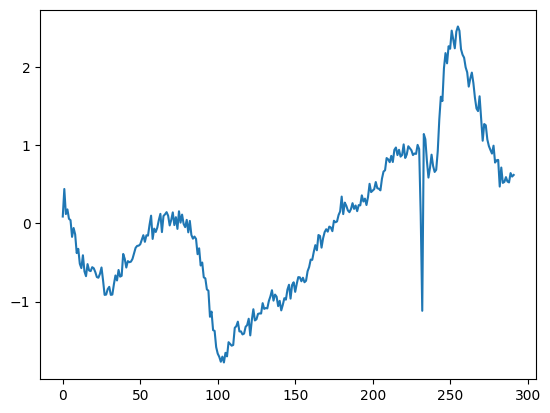

In [60]:
Supply_Demand_Indicators_df['Labor_Tightness_Index'] = Supply_Demand_Indicators_df[[
    'Job_Openings_z', 'Hires_z', 'Quits_z']].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Labor_Tightness_Index'].plot()

### 2. **Labor Distress Index**

**Purpose:** Measures **labor market slack or underutilization** from the worker side.

Captures the extent of unmet labor supply and discouraged or underemployed workers.

**Formula (average z-score):**
- Unemployment Level  
- Not in Labor Force, Want a Job Now (NILFWJN)  
- Marginally Attached Workers  
- Involuntary Part-Time Rate

**Interpretation:**  
A rising index = more people are seeking work or stuck in part-time roles, suggesting hidden or rising labor distress.

---


<Axes: >

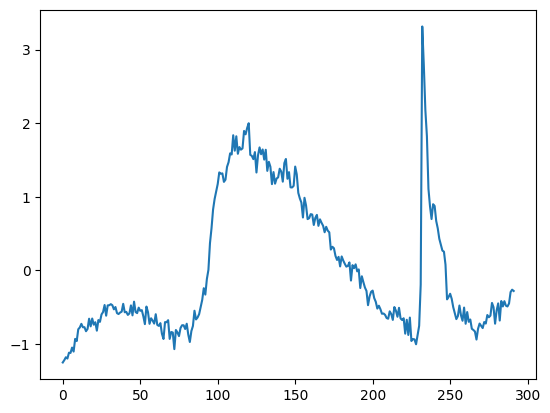

In [61]:
Supply_Demand_Indicators_df['Labor_Distress_Index'] = Supply_Demand_Indicators_df[[
    'Unemployed_z', 'NILFWJN_z', 'Marginally_Attached_z', 'Involuntary_Part_Time_Rate_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Labor_Distress_Index'].plot()

### 3. Demand-Supply Gap Index

**Purpose:** Shows the **net balance** between labor demand and labor supply.

Captures whether demand is outpacing supply (tight market) or vice versa (slack market).

**Formula:**  
`Labor Tightness Index – Labor Distress Index`

**Interpretation:**  
- A rising index = demand > supply (tight labor market).  
- A negative or falling index = supply > demand (slack labor market).

---


<Axes: >

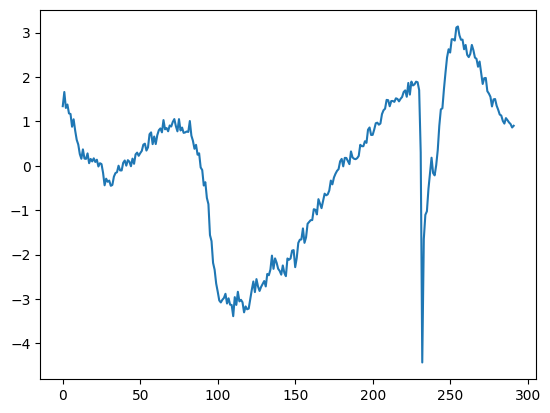

In [62]:
# Composite Supply and Demand Indices
Supply_Demand_Indicators_df['Labor_Supply_Index'] = Supply_Demand_Indicators_df[[
    'Unemployed_z', 'NILFWJN_z', 'Marginally_Attached_z', 'Involuntary_Part_Time_Rate_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Labor_Demand_Index'] = Supply_Demand_Indicators_df[[
    'Job_Openings_z', 'Hires_z', 'Quits_z'
]].mean(axis=1, skipna=True)

# Demand-Supply Gap
Supply_Demand_Indicators_df['Demand_Supply_Gap'] = Supply_Demand_Indicators_df['Labor_Demand_Index'] - Supply_Demand_Indicators_df['Labor_Supply_Index']

Supply_Demand_Indicators_df['Demand_Supply_Gap'].plot()

## Structural/Behavioral Indicies

| **Category**              | **Includes**                                       | **Use Case**                                                  |
| ------------------------- | -------------------------------------------------- | ------------------------------------------------------------- |
| **Structural/Behavioral** | Hiring Friction, Compensation Pressure, Labor Flow | Understand **dynamics, inefficiencies, or inflection points** |

---

| **Index Name**                     | **Purpose**                                           | **Key Components**                                                                                            | **Rising Value Indicates**                              |
| ---------------------------------- | ----------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| 🧮 **Hiring Friction Index**       | Detects **matching difficulty / inefficiency**        | Openings per Hire, Inverse of Hires per Unemployed, Layoffs per Opening                                       | Structural mismatch; employers struggling to fill roles |
| 💸 **Compensation Pressure Index** | Gauges **wage and hours-based stress**                | Avg Weekly Earnings YoY %, Avg Weekly Hours, Median Hourly Wage Growth (ATL Fed), ECI (Employment Cost Index) | Rising wage inflation pressure                          |
| 🔄 **Labor Market Flow Index**     | Tracks **churn, confidence, and inflection risk**     | Quits Rate, Quits-to-Layoffs Ratio, Total Separations, Temp Help Employment YoY %                             | High churn, confidence, or overheating dynamics         |

### 1. **Hiring Friction Index**
**Purpose:** Captures **difficulties in matching labor demand to actual hires**

**Signals structural mismatches** or frictions in the labor market.

**Formula (average z-score):**

* Openings per Hire
* Hires per Unemployed (inverse)
* Layoffs per Opening

A rising index = more demand per hire + lower conversion + higher churn.


<Axes: >

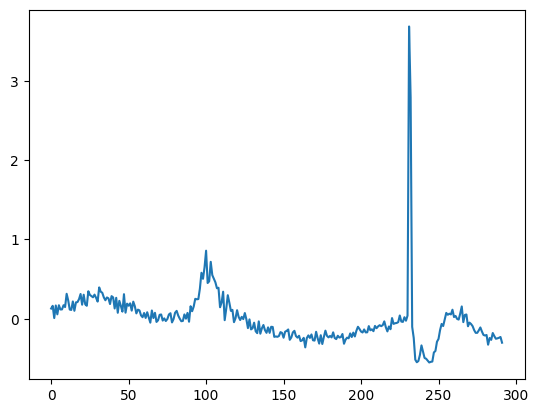

In [63]:
Supply_Demand_Indicators_df['OpeningsPerHire_z'] = zscore(Supply_Demand_Indicators_df['OpeningsPerHire'], nan_policy='omit')
Supply_Demand_Indicators_df['HiresPerUnemployed_z'] = zscore(Supply_Demand_Indicators_df['HiresPerUnemployed'], nan_policy='omit')
Supply_Demand_Indicators_df['LayoffsPerOpening_z'] = zscore(Supply_Demand_Indicators_df['LayoffsPerOpening'], nan_policy='omit')

Supply_Demand_Indicators_df['Hiring_Friction_Index'] = Supply_Demand_Indicators_df[[
    'OpeningsPerHire_z', 'HiresPerUnemployed_z', 'LayoffsPerOpening_z'
]].mean(axis=1, skipna=True)

Supply_Demand_Indicators_df['Hiring_Friction_Index'].plot()

### 2. **Compensation Pressure Index**

**Purpose:** Measures **wage and hours-based pressure** from a tightening labor market.

Indicates potential wage inflation or compensation stress due to worker scarcity.

**Formula (average z-score):**
- Average Weekly Earnings YoY %  
- Average Weekly Hours (Total Private)  
- Median Hourly Wage Growth (ATL Fed)  
- Employment Cost Index (ECI)

**Interpretation:**  
A rising index = stronger wage growth and longer workweeks → increased cost pressures on employers.

---



### 3. **Labor Market Flow Index**

**Purpose:** Tracks **voluntary and involuntary job market churn** and worker confidence.

Useful for identifying inflection points, overheating, or cooling.

**Formula (average z-score):**
- Quits Rate  
- Quits-to-Layoffs Ratio  
- Total Separations  
- Temp Help Employment YoY %

**Interpretation:**  
A rising index = greater churn and job switching, often linked to strong labor confidence and expansionary cycles.

---


In [64]:
Supply_Demand_Indicators_df['Qu']

KeyError: 'Qu'

## Latent Risk Indicators

| **Category**              | **Includes**                                       | **Use Case**                                                  |
| ------------------------- | -------------------------------------------------- | ------------------------------------------------------------- |
| **Latent Risk Indicator** | Latent Labor Slack                                 | Identify **hidden slack** missed by U3                        |

---

| **Index Name**                     | **Purpose**                                           | **Key Components**                                                                                            | **Rising Value Indicates**                              |
| ---------------------------------- | ----------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| 🫥 **Latent Labor Slack Index**    | Reveals **hidden slack not in headline unemployment** | NILFWJN / Pop, Marginally Attached / Not in Labor Force, Involuntary Part-Time Rate, U6 – U3 Spread           | Labor force underutilization beneath the surface        |


### 7. **Latent Labor Slack Index**

**Purpose:** Measures **hidden labor market slack** not visible in headline unemployment.

Captures discouraged and underemployed populations outside the U3 rate.

**Formula (average z-score):**
- NILFWJN / Total Population  
- Marginally Attached / Not in Labor Force  
- Involuntary Part-Time Rate  
- U6 – U3 Spread

**Interpretation:**  
A rising index = labor underutilization is growing beneath the surface, indicating fragility in the workforce.

---